<a href="https://colab.research.google.com/github/MaxJer/Automatic-Scaffold-Measurement/blob/main/SAM%20coaxialscreening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# Segment Anything Model (SAM)

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/facebookresearch/segment-anything) [![arXiv](https://img.shields.io/badge/arXiv-2304.02643-b31b1b.svg)](https://arxiv.org/abs/2304.02643)

Segment Anything Model (SAM): a new AI model from Meta AI that can "cut out" any object, in any image, with a single click. SAM is a promptable segmentation system with zero-shot generalization to unfamiliar objects and images, without the need for additional training. This notebook is an extension of the [official notebook](https://colab.research.google.com/github/facebookresearch/segment-anything/blob/main/notebooks/automatic_mask_generator_example.ipynb) prepared by Meta AI.

![segment anything model](https://media.roboflow.com/notebooks/examples/segment-anything-model-paper.png)

## Complementary Materials

---

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/how-to-segment-anything-with-sam.ipynb) [![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/D-D6ZmadzPE) [![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-use-segment-anything-model-sam)

We recommend that you follow along in this notebook while reading the blog post on Segment Anything Model.

![segment anything model blogpost](https://media.roboflow.com/notebooks/examples/segment-anything-model-blogpost.png)

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- **Before you start** - Make sure you have access to the GPU
- Install Segment Anything Model (SAM)
- Download Example Data
- Load Model
- Automated Mask Generation
- Generate Segmentation with Bounding Box
- Segment Anything in Roboflow Universe Dataset

## Let's begin!

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Fri Aug 11 22:56:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


## Install Segment Anything Model (SAM) and other dependencies

In [ ]:
%cd {HOME}

import sys
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

/content
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-m6nbh5iu
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-m6nbh5iu
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36588 sha256=ef9f050c69ed2d627ced8bf6f316a81b958fbd017c2c5f4cd74bc8f89e3b6286
  Stored in directory: /tmp/pip-ephem-wheel-cache-e8r5w56s/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [ ]:
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00


### Download SAM weights

In [ ]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

/content
/content/weights


In [ ]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/content/weights/sam_vit_h_4b8939.pth ; exist: True


## Download Example Data

**NONE:** Let's download few example images. Feel free to use your images or videos.

In [ ]:
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg

/content
/content/data


## Load Model

In [ ]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

## Automated Mask Generation

To run automatic mask generation, provide a SAM model to the `SamAutomaticMaskGenerator` class. Set the path below to the SAM checkpoint. Running on CUDA and with the default model is recommended.

In [ ]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

IMAGE_NAME = '/content/drive/My Drive/Colab Notebooks/59 n3.jpg'

#import os

#IMAGE_NAME = "dog.jpeg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Generate masks with SAM

In [ ]:
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

### Output format

`SamAutomaticMaskGenerator` returns a `list` of masks, where each mask is a `dict` containing various information about the mask:

* `segmentation` - `[np.ndarray]` - the mask with `(W, H)` shape, and `bool` type
* `area` - `[int]` - the area of the mask in pixels
* `bbox` - `[List[int]]` - the boundary box of the mask in `xywh` format
* `predicted_iou` - `[float]` - the model's own prediction for the quality of the mask
* `point_coords` - `[List[List[float]]]` - the sampled input point that generated this mask
* `stability_score` - `[float]` - an additional measure of mask quality
* `crop_box` - `List[int]` - the crop of the image used to generate this mask in `xywh` format

In [ ]:
print(sam_result[0].keys())

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


### Results visualisation with Supervision

As of version `0.5.0` Supervision has native support for SAM.

In [ ]:
from google.colab import drive
import cv2
import numpy as np
import os
import supervision as sv

drive.mount('/content/drive')

# Set the path to the image folder and output folder
image_folder = '/content/drive/My Drive/Colab Notebooks/coaxial images'
output_folder = '/content/drive/My Drive/Colab Notebooks/coaxial annotated_images'

# Specify the region of interest (ROI)
roi = {'x': 0, 'y': 164, 'width': 1903, 'height': 138, 'label': ''}

def process_images(image_folder, output_folder, roi):
    # Get a list of all image files in the folder
    image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Create a BoxAnnotator and MaskAnnotator instance
    box_annotator = sv.BoxAnnotator(color=sv.Color.red())
    mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

    # Loop through the image files
    for file_name in image_files:
        # Read the image
        image_path = os.path.join(image_folder, file_name)
        image_bgr = cv2.imread(image_path)

        # Convert BGR to RGB
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

        # Set the image for the mask predictor
        mask_predictor.set_image(image_rgb)

        # Convert the ROI to a numpy array
        box = np.array([
            roi['x'],
            roi['y'],
            roi['x'] + roi['width'],
            roi['y'] + roi['height']
        ])

        # Predict masks within the ROI
        masks, scores, logits = mask_predictor.predict(
            box=box,
            multimask_output=True
        )

        # Create Detections from the predicted masks
        detections = sv.Detections(
            xyxy=sv.mask_to_xyxy(masks=masks),
            mask=masks
        )
        detections = detections[detections.area == np.max(detections.area)]

        # Annotate the source image and segmented image with the ROI
        source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=True)
        segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

        # Save the annotated images
        output_path = os.path.join(output_folder, file_name)
        cv2.imwrite(output_path, segmented_image)

        # Display the images
        sv.plot_images_grid(
            images=[source_image, segmented_image],
            grid_size=(1, 2),
            titles=['source image', 'segmented image']
        )

# Example usage
process_images(image_folder, output_folder, roi)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


error: ignored

In [ ]:
mask_annotator = sv.MaskAnnotator()

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

AttributeError: ignored

In [ ]:
from google.colab import drive
import cv2
import os
import supervision as sv

drive.mount('/content/drive')

# Set the path to the image folder
image_folder = '/content/drive/My Drive/Colab Notebooks/coaxial images'
output_folder = '/content/drive/My Drive/Colab Notebooks/coaxial annotated_images'

def process_images(image_folder, output_folder):
    # Get a list of all image files in the folder
    image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Create a MaskAnnotator instance
    mask_annotator = sv.MaskAnnotator()

    # Loop through the image files
    for file_name in image_files:
        # Read the image
        image_path = os.path.join(image_folder, file_name)
        image_bgr = cv2.imread(image_path)

        # Convert BGR to RGB
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

        # Perform your operations on the image
        sam_result = mask_generator.generate(image_rgb)
        detections = sv.Detections.from_sam(sam_result=sam_result)
        annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

        # Save the annotated image
        output_path = os.path.join(output_folder, file_name)
        cv2.imwrite(output_path, annotated_image)

        # Display the images
        sv.plot_images_grid(
            images=[image_bgr, annotated_image],
            grid_size=(1, 2),
            titles=['source image', 'annotated image']
        )

# Example usage
process_images(image_folder, output_folder)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


error: ignored

### Interaction with segmentation results

In [ ]:
int(len(masks))

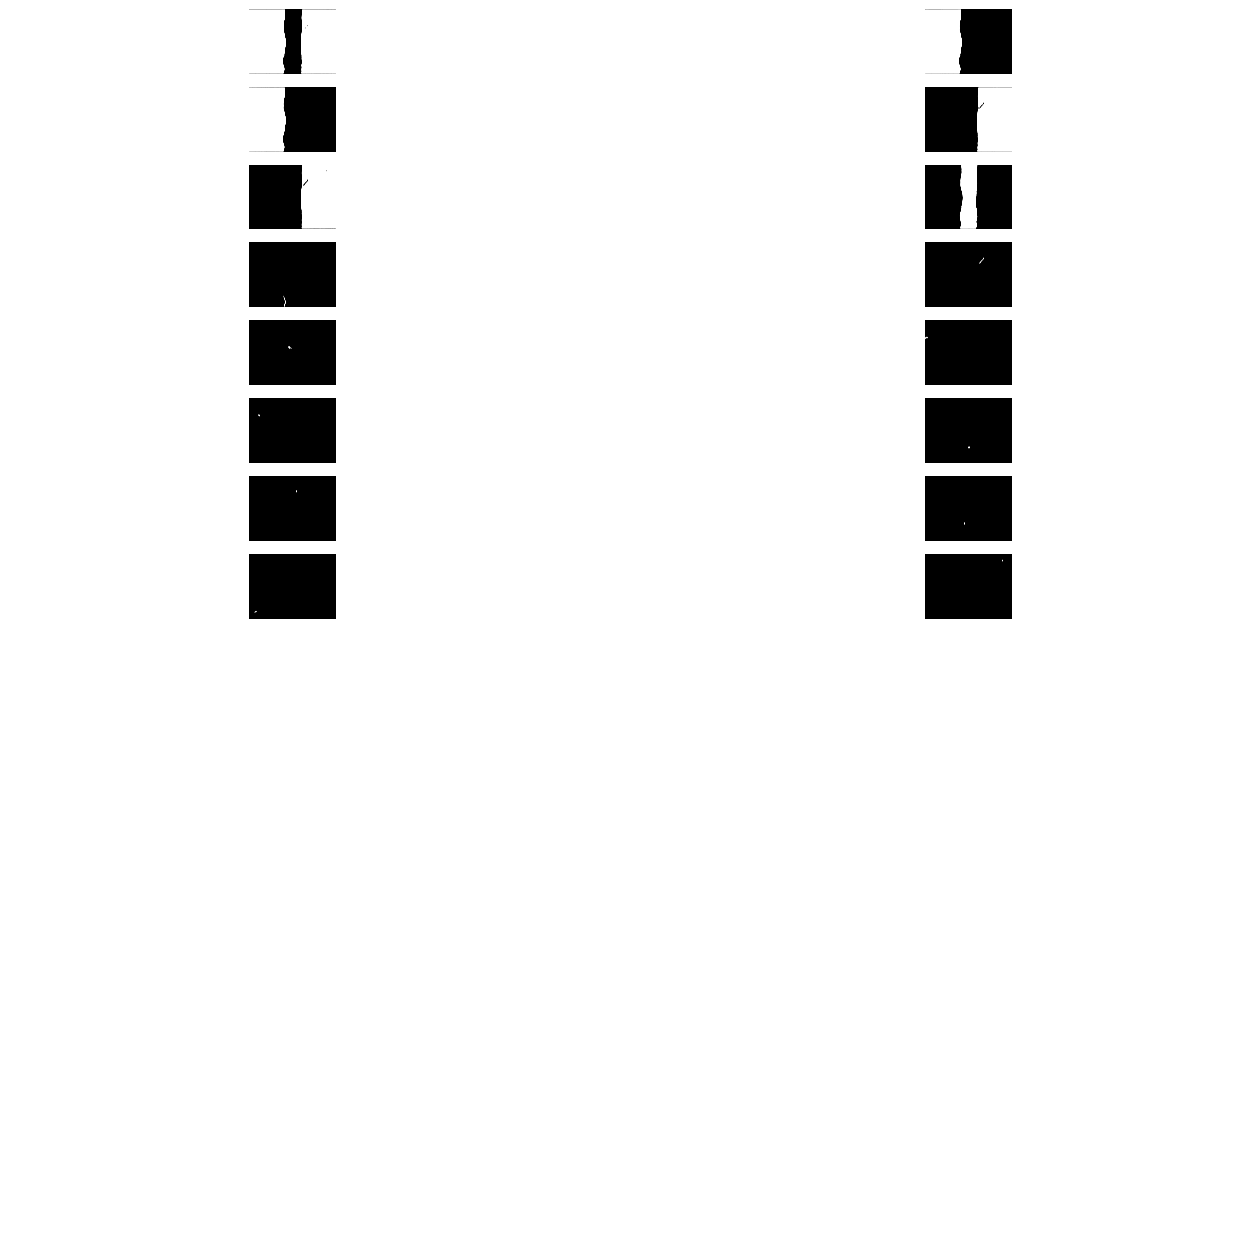

In [ ]:
masks = [
    mask['segmentation']
    for mask
    in sorted(sam_result, key=lambda x: x['area'], reverse=True)
]

sv.plot_images_grid(
    images=masks,
    grid_size=(16, int(len(masks) / 8)),
    size=(16, 16)
)

## Generate Segmentation with Bounding Box

The `SamPredictor` class provides an easy interface to the model for prompting the model. It allows the user to first set an image using the `set_image` method, which calculates the necessary image embeddings. Then, prompts can be provided via the `predict` method to efficiently predict masks from those prompts. The model can take as input both point and box prompts, as well as masks from the previous iteration of prediction.

In [ ]:
mask_predictor = SamPredictor(sam)

In [ ]:
#import os

#IMAGE_NAME = "zigzag.jpeg"
#IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

from google.colab import drive
drive.mount('/content/drive')

IMAGE_NAME = '/content/drive/My Drive/Colab Notebooks/coaxial images/zigzag.jpg'

#import os

#IMAGE_NAME = "dog.jpeg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMAGE_NAME

'/content/drive/My Drive/Colab Notebooks/coaxial images/zigzag.jpg'

In [ ]:
IMAGE_PATH

'/content/drive/My Drive/Colab Notebooks/coaxial images/zigzag.jpg'

### Draw Box



In [ ]:
# helper function that loads an image before adding it to the widget

import base64

def encode_image(filepath):
    with open(filepath, 'rb') as f:
        image_bytes = f.read()
    encoded = str(base64.b64encode(image_bytes), 'utf-8')
    return "data:image/jpg;base64,"+encoded

**NOTE:** Execute cell below and use your mouse to draw bounding box on the image 👇

In [ ]:
IS_COLAB = True

if IS_COLAB:
    from google.colab import output
    output.enable_custom_widget_manager()

from jupyter_bbox_widget import BBoxWidget

widget = BBoxWidget()
widget.image = encode_image(IMAGE_PATH)
widget

BBoxWidget(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#b…

In [ ]:
widget.bboxes

[{'x': 372, 'y': 131, 'width': 379, 'height': 628, 'label': ''}]

### Generate masks with SAM

**NOTE:** `SamPredictor.predict` method takes `np.ndarray` `box` argument in `[x_min, y_min, x_max, y_max]` format. Let's reorganise your data first

In [ ]:
import numpy as np

# default_box is going to be used if you will not draw any box on image above
default_box = {'x': 372, 'y': 131, 'width': 379, 'height': 628, 'label': ''}

box = widget.bboxes[0] if widget.bboxes else default_box
box = np.array([
    box['x'],
    box['y'],
    box['x'] + box['width'],
    box['y'] + box['height']
])

In [ ]:
import cv2
import numpy as np
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

mask_predictor.set_image(image_rgb)

masks, scores, logits = mask_predictor.predict(
    box=box,
    multimask_output=True
)

### Results visualisation with Supervision

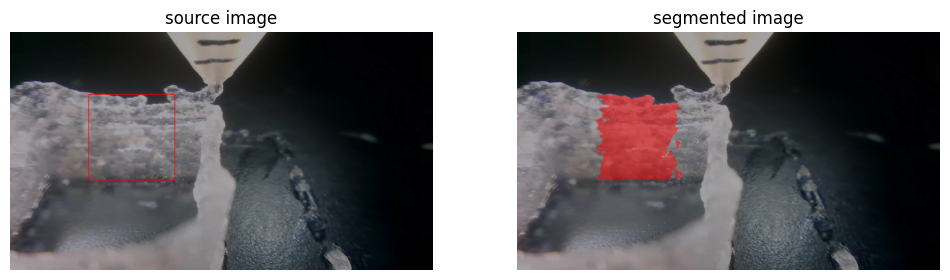

In [ ]:
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=masks),
    mask=masks
)
detections = detections[detections.area == np.max(detections.area)]

source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=True)
segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[source_image, segmented_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

### Interaction with segmentation results

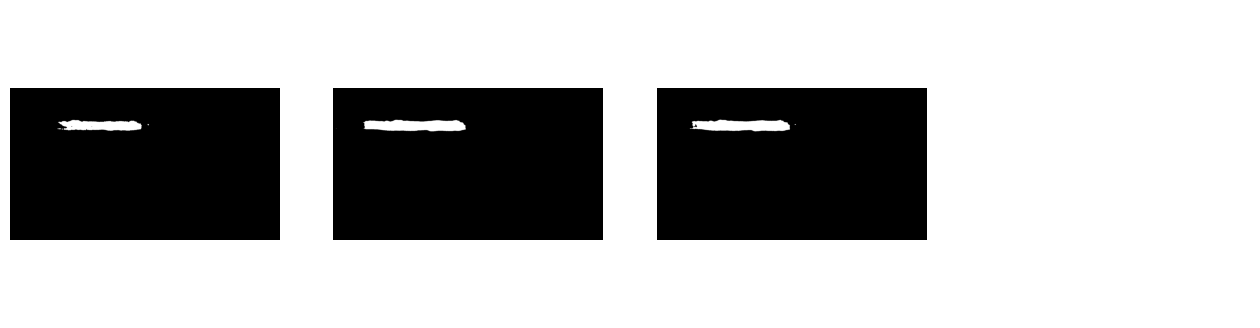

In [ ]:
import supervision as v

sv.plot_images_grid(
    images=masks,
    grid_size=(1, 4),
    size=(16, 4)
)

In [ ]:
import numpy as np

# Calculate the area of each mask
mask_areas = [np.sum(mask) for mask in masks]

# Print the area of each mask
for i, area in enumerate(mask_areas):
    print(f"Mask {i+1} area: {area}")

Mask 1 area: 34914
Mask 2 area: 48768
Mask 3 area: 46515


In [ ]:
import numpy as np

# Calculate the width and height of each mask
mask_widths = [np.max(np.sum(mask, axis=0)) for mask in masks]
mask_heights = [np.max(np.sum(mask, axis=1)) for mask in masks]

# Calculate the average width and height
average_width = np.mean(mask_widths)
average_height = np.mean(mask_heights)

# Calculate the standard deviation of width and height
std_width = np.std(mask_widths)
std_height = np.std(mask_heights)

# Calculate the uniformity score
uniformity_score = std_width + std_height

# Print the results
print(f"Average Width: {average_width}")
print(f"Average Height: {average_height}")
print(f"Standard Deviation of Width: {std_width}")
print(f"Standard Deviation of Height: {std_height}")
print(f"Uniformity Score: {uniformity_score}")

### The maximum value from the sum along the width (columns) gives the width of the mask, and the maximum value from the sum along the height (rows) gives the height of the mask.

NameError: ignored

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


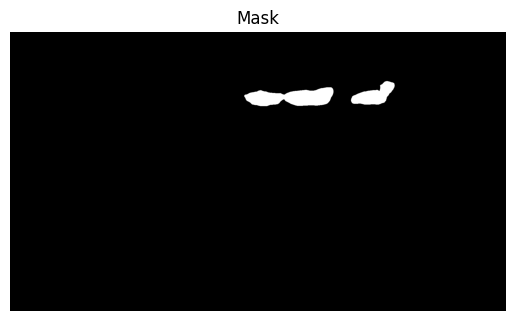

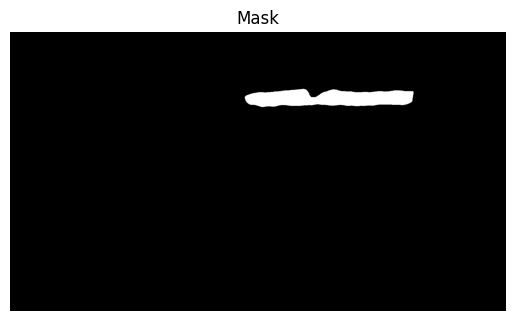

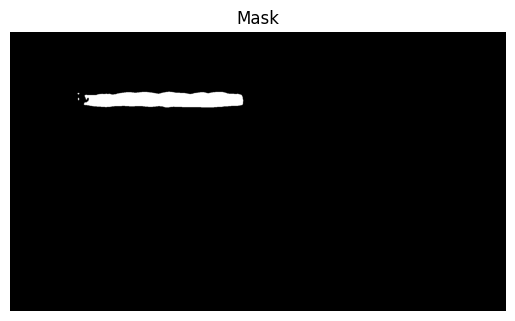

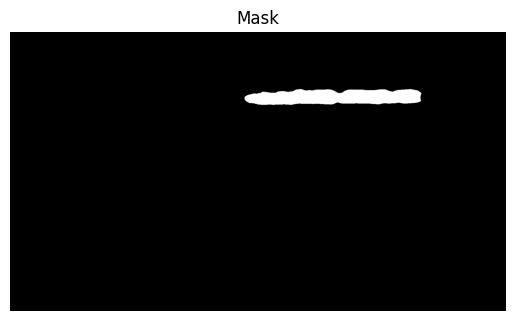

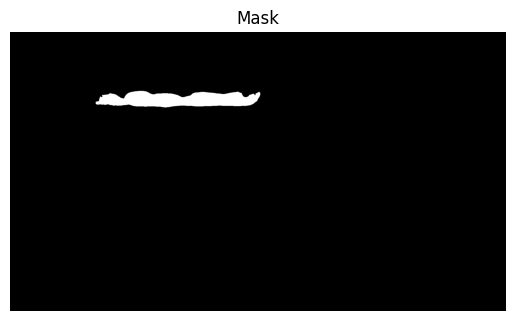

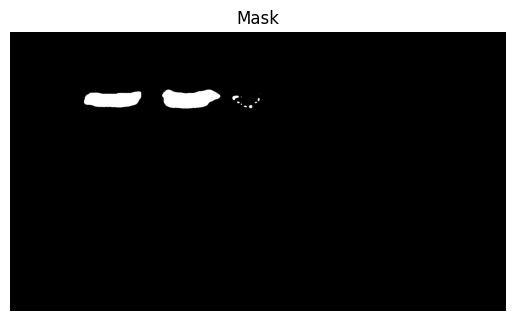

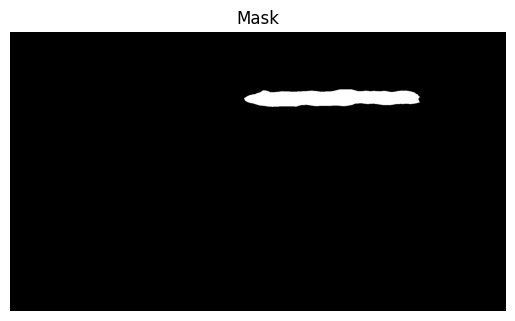

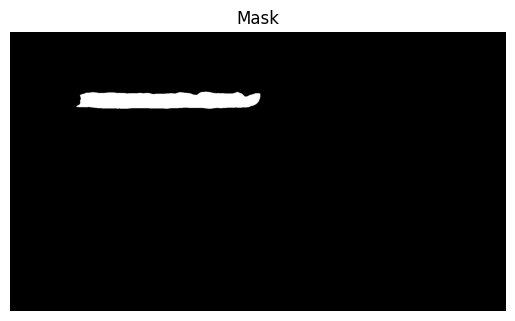

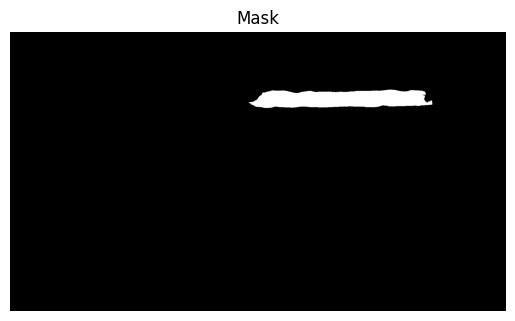

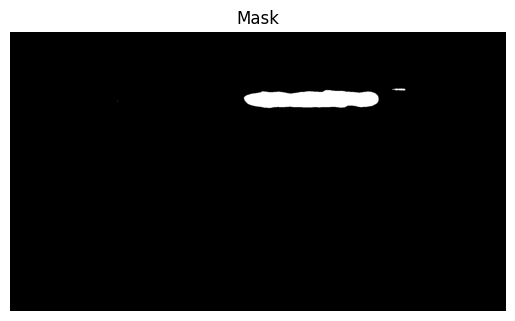

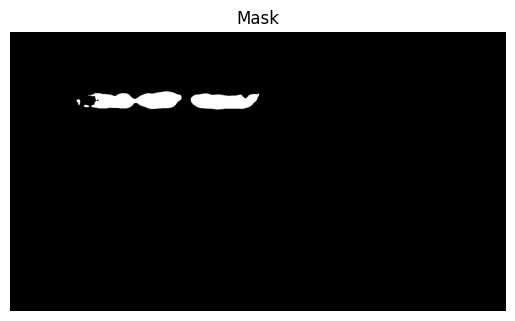

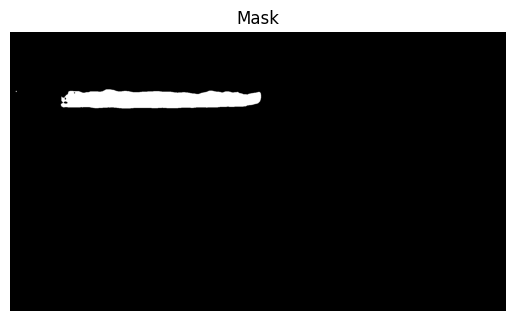

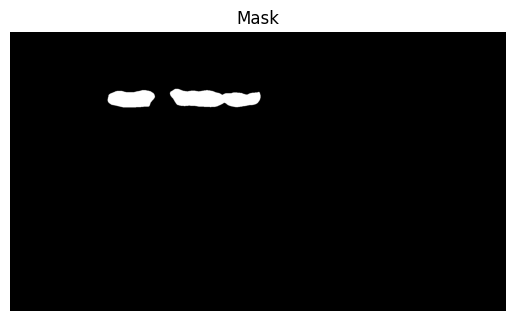

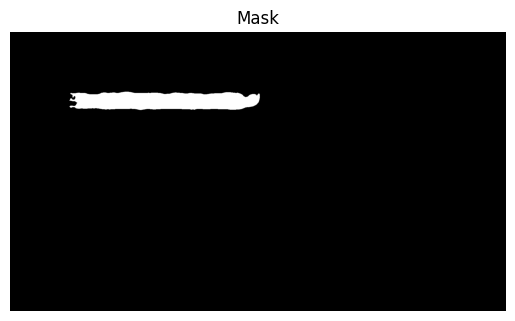

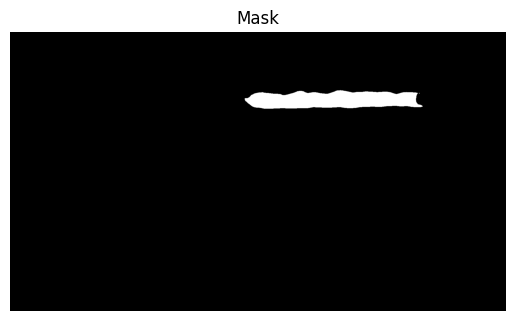

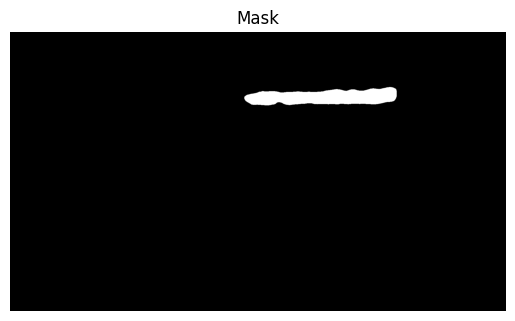

Results saved to /content/drive/My Drive/Colab Notebooks/coaxial results.xlsx


In [ ]:
from google.colab import drive
import cv2
import numpy as np
import os
import pandas as pd
import supervision as sv
import matplotlib.pyplot as plt

drive.mount('/content/drive')

# Set the path to the image folder and output folder
image_folder = '/content/drive/My Drive/Colab Notebooks/coaxial images'
output_folder = '/content/drive/My Drive/Colab Notebooks/coaxial annotated_images'
output_file = '/content/drive/My Drive/Colab Notebooks/coaxial results.xlsx'

# Specify the region of interest (ROI)
roi = {'x': 347, 'y': 234, 'width': 1209, 'height': 39, 'label': ''}

#zigzagcoordinates{'x': 377, 'y': 239, 'width': 1150, 'height': 104, 'label': ''}


def measure_average_pixels(mask, roi):
    # Get the region of interest from the mask
    roi_mask = mask[roi['y']:roi['y']+roi['height'], roi['x']:roi['x']+roi['width']]

    # Calculate the average number of white pixels for height
    height_sum = np.sum(roi_mask, axis=1)
    height_count = np.sum(height_sum > 0)  # Count rows with at least one white pixel
    height_average = np.mean(height_sum[height_sum > 0])
    height_std = np.std(height_sum[height_sum > 0])

    # Calculate the average number of white pixels for width
    width_sum = np.sum(roi_mask, axis=0)
    width_count = np.sum(width_sum > 0)  # Count columns with at least one white pixel
    width_average = np.mean(width_sum[width_sum > 0])
    width_std = np.std(width_sum[width_sum > 0])

        # Calculate the maximum number of white pixels for height
    height_max = np.max(np.sum(roi_mask, axis=1))

    return height_average, height_std, width_average, width_std

def process_images(image_folder, output_folder, roi, output_file):
    # Get a list of all image files in the folder
    image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Create a BoxAnnotator and MaskAnnotator instance
    box_annotator = sv.BoxAnnotator(color=sv.Color.red())
    mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

    # Initialize lists to store the results
    image_names = []
    areas = []
    avg_widths = []
    std_widths = []
    avg_heights = []
    std_heights = []

    # Loop through the image files
    for file_name in image_files:
        # Read the image
        image_path = os.path.join(image_folder, file_name)
        image_bgr = cv2.imread(image_path)

        # Convert BGR to RGB
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

        # Set the image for the mask predictor
        mask_predictor.set_image(image_rgb)

        # Convert the ROI to a numpy array
        box = np.array([
            roi['x'],
            roi['y'],
            roi['x'] + roi['width'],
            roi['y'] + roi['height']
        ])

        # Predict masks within the ROI
        masks, scores, logits = mask_predictor.predict(
            box=box,
            multimask_output=True
        )

        # Create Detections from the predicted masks
        detections = sv.Detections(
            xyxy=sv.mask_to_xyxy(masks=masks),
            mask=masks
        )
        detections = detections[detections.area == np.max(detections.area)]

        # Annotate the source image and segmented image with the ROI
        source_image = box_annotator.annotate(scene=image_bgr.copy(), detections=detections, skip_label=True)
        segmented_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

        # Calculate measurements
        area = np.sum(detections.area)
        mask = detections.mask[0]  # Assuming only one mask per image

        # Measure average number of white pixels
        height_average, height_std, width_average, width_std = measure_average_pixels(mask, roi)

        # Store the results
        image_names.append(file_name)
        areas.append(area)
        avg_widths.append(width_average)
        std_widths.append(width_std)
        avg_heights.append(height_average)
        std_heights.append(height_std)

        # Save the annotated image
        output_path = os.path.join(output_folder, file_name)
        cv2.imwrite(output_path, segmented_image)

        # Display the mask
        plt.imshow(mask, cmap='gray')
        plt.title('Mask')
        plt.axis('off')
        plt.show()

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Image Name': image_names,
        'Area': areas,
        'Average Width': avg_widths,
        'Std Dev Width': std_widths,
        'Average Height': avg_heights,
        'Std Dev Height': std_heights
    })

    # Save the results to an Excel file
    results_df.to_excel(output_file, index=False)

    print("Results saved to", output_file)

# Example usage
process_images(image_folder, output_folder, roi, output_file)

## Segment Anything in Roboflow Universe Dataset

### Utils Supporting Dataset Processing

A couple of helper functions that, unfortunately, we have to write ourselves to facilitate the processing of COCO annotations.

In [ ]:
import numpy as np
from dataclasses import dataclass
from typing import List, Tuple, Union, Optional
from dataclasses_json import dataclass_json
from supervision import Detections


@dataclass_json
@dataclass
class COCOCategory:
    id: int
    name: str
    supercategory: str


@dataclass_json
@dataclass
class COCOImage:
    id: int
    width: int
    height: int
    file_name: str
    license: int
    date_captured: str
    coco_url: Optional[str] = None
    flickr_url: Optional[str] = None


@dataclass_json
@dataclass
class COCOAnnotation:
    id: int
    image_id: int
    category_id: int
    segmentation: List[List[float]]
    area: float
    bbox: Tuple[float, float, float, float]
    iscrowd: int


@dataclass_json
@dataclass
class COCOLicense:
    id: int
    name: str
    url: str


@dataclass_json
@dataclass
class COCOJson:
    images: List[COCOImage]
    annotations: List[COCOAnnotation]
    categories: List[COCOCategory]
    licenses: List[COCOLicense]


def load_coco_json(json_file: str) -> COCOJson:
    import json

    with open(json_file, "r") as f:
        json_data = json.load(f)

    return COCOJson.from_dict(json_data)


class COCOJsonUtility:
    @staticmethod
    def get_annotations_by_image_id(coco_data: COCOJson, image_id: int) -> List[COCOAnnotation]:
        return [annotation for annotation in coco_data.annotations if annotation.image_id == image_id]

    @staticmethod
    def get_annotations_by_image_path(coco_data: COCOJson, image_path: str) -> Optional[List[COCOAnnotation]]:
        image = COCOJsonUtility.get_image_by_path(coco_data, image_path)
        if image:
            return COCOJsonUtility.get_annotations_by_image_id(coco_data, image.id)
        else:
            return None

    @staticmethod
    def get_image_by_path(coco_data: COCOJson, image_path: str) -> Optional[COCOImage]:
        for image in coco_data.images:
            if image.file_name == image_path:
                return image
        return None

    @staticmethod
    def annotations2detections(annotations: List[COCOAnnotation]) -> Detections:
        class_id, xyxy = [], []

        for annotation in annotations:
            x_min, y_min, width, height = annotation.bbox
            class_id.append(annotation.category_id)
            xyxy.append([
                x_min,
                y_min,
                x_min + width,
                y_min + height
            ])

        return Detections(
            xyxy=np.array(xyxy, dtype=int),
            class_id=np.array(class_id, dtype=int)
        )

### Download Dataset from Roboflow

In [ ]:
%cd {HOME}

import roboflow
from roboflow import Roboflow

roboflow.login()

rf = Roboflow()

project = rf.workspace("hashira-fhxpj").project("mri-brain-tumor")
dataset = project.version(1).download("coco")

/content
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to MRI-BRAIN-TUMOR-1 in coco:: 100%|██████████| 85/85 [00:00<00:00, 1898.83it/s]


In [ ]:
import os

DATA_SET_SUBDIRECTORY = "test"
ANNOTATIONS_FILE_NAME = "_annotations.coco.json"
IMAGES_DIRECTORY_PATH = os.path.join(dataset.location, DATA_SET_SUBDIRECTORY)
ANNOTATIONS_FILE_PATH = os.path.join(dataset.location, DATA_SET_SUBDIRECTORY, ANNOTATIONS_FILE_NAME)

In [ ]:
coco_data = load_coco_json(json_file=ANNOTATIONS_FILE_PATH)

CLASSES = [
    category.name
    for category
    in coco_data.categories
    if category.supercategory != 'none'
]

IMAGES = [
    image.file_name
    for image
    in coco_data.images
]

In [ ]:
CLASSES

['YES-TUMOR']

### Single Image Bounding Box to Mask

In [ ]:
# set random seed to allow easy reproduction of the experiment

import random
random.seed(10)

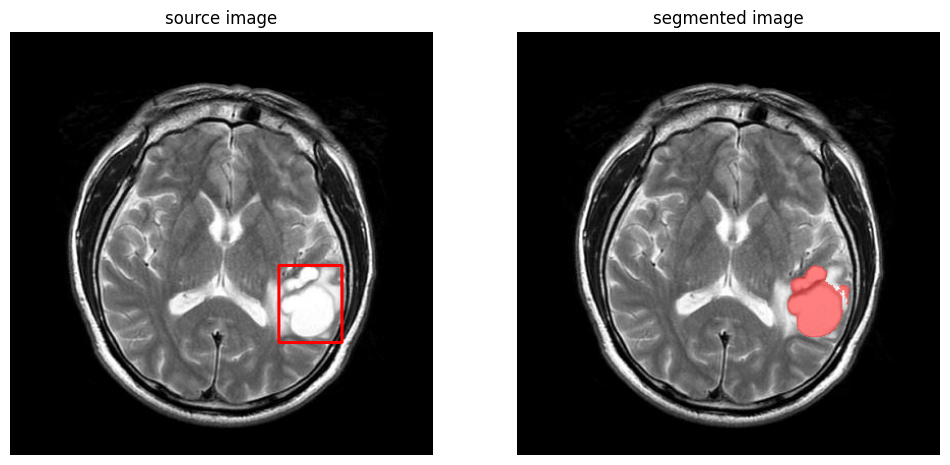

In [ ]:
EXAMPLE_IMAGE_NAME = random.choice(IMAGES)
EXAMPLE_IMAGE_PATH = os.path.join(dataset.location, DATA_SET_SUBDIRECTORY, EXAMPLE_IMAGE_NAME)

# load dataset annotations
annotations = COCOJsonUtility.get_annotations_by_image_path(coco_data=coco_data, image_path=EXAMPLE_IMAGE_NAME)
ground_truth = COCOJsonUtility.annotations2detections(annotations=annotations)

# small hack - coco numerate classes from 1, model from 0 + we drop first redundant class from coco json
ground_truth.class_id = ground_truth.class_id - 1

# load image
image_bgr = cv2.imread(EXAMPLE_IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# initiate annotator
box_annotator = sv.BoxAnnotator(color=sv.Color.red())
mask_annotator = sv.MaskAnnotator(color=sv.Color.red())

# annotate ground truth
annotated_frame_ground_truth = box_annotator.annotate(scene=image_bgr.copy(), detections=ground_truth, skip_label=True)

# run SAM inference
mask_predictor.set_image(image_rgb)

masks, scores, logits = mask_predictor.predict(
    box=ground_truth.xyxy[0],
    multimask_output=True
)

detections = sv.Detections(
    xyxy=sv.mask_to_xyxy(masks=masks),
    mask=masks
)
detections = detections[detections.area == np.max(detections.area)]

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[annotated_frame_ground_truth, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.